In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Input variabel suhu dan kelembapan
suhu = np.arange(0, 41, 1)  # 0-40°C
kelembapan = np.arange(0, 101, 1)  # 0-100%

# Himpunan fuzzy untuk suhu
suhu_dingin = fuzz.trapmf(suhu, [0, 16, 22, 23])  # Suhu rendah
suhu_normal = fuzz.trimf(suhu, [22, 25, 28])  # Suhu sedang
suhu_panas = fuzz.trapmf(suhu, [28, 30, 40, 40])  # Suhu tinggi

# Himpunan fuzzy untuk kelembapan
kelembapan_kering = fuzz.trimf(kelembapan, [0, 20, 40])  # Kelembapan rendah
kelembapan_normal = fuzz.trimf(kelembapan, [40, 50, 70])  # Kelembapan sedang
kelembapan_lembap = fuzz.trimf(kelembapan, [70, 85, 100])  # Kelembapan tinggi

# Himpunan fuzzy untuk kecepatan kipas
kecepatan_kipas_range = np.arange(0, 11, 1)  # Rentang kecepatan kipas dari 0 hingga 10
kipas_rendah = fuzz.trimf(kecepatan_kipas_range, [0, 1, 3])  # Kecepatan rendah
kipas_sedang = fuzz.trimf(kecepatan_kipas_range, [3, 5, 7])  # Kecepatan sedang
kipas_tinggi = fuzz.trimf(kecepatan_kipas_range, [7, 9, 10])  # Kecepatan tinggi

# Visualisasi himpunan fuzzy
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

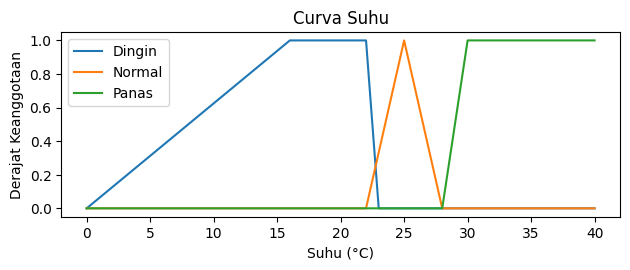

In [6]:
# Suhu
plt.subplot(2, 1, 1)
plt.plot(suhu, suhu_dingin, label='Dingin')
plt.plot(suhu, suhu_normal, label='Normal')
plt.plot(suhu, suhu_panas, label='Panas')
plt.title('Curva Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.tight_layout()
plt.show()

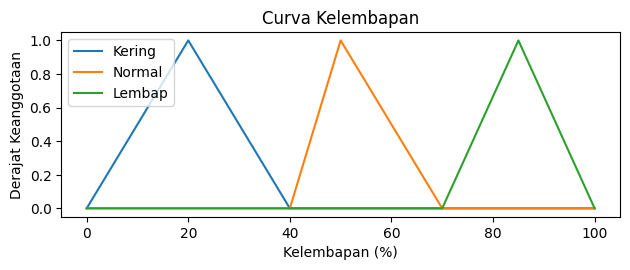

In [7]:
# Kelembapan
plt.subplot(2, 1, 2)
plt.plot(kelembapan, kelembapan_kering, label='Kering')
plt.plot(kelembapan, kelembapan_normal, label='Normal')
plt.plot(kelembapan, kelembapan_lembap, label='Lembap')
plt.title('Curva Kelembapan')
plt.xlabel('Kelembapan (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.tight_layout()
plt.show()

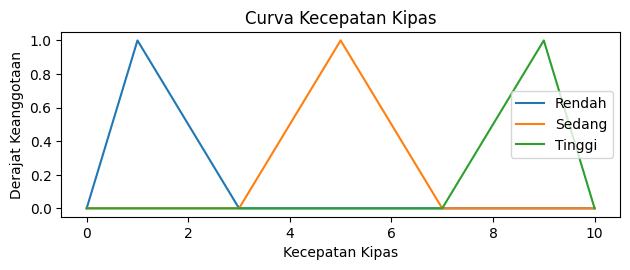

In [8]:
# Kecepatan Kipas
plt.subplot(2, 1, 1)
plt.plot(kecepatan_kipas_range, kipas_rendah, label='Rendah')
plt.plot(kecepatan_kipas_range, kipas_sedang, label='Sedang')
plt.plot(kecepatan_kipas_range, kipas_tinggi, label='Tinggi')
plt.title('Curva Kecepatan Kipas')
plt.xlabel('Kecepatan Kipas')
plt.ylabel('Derajat Keanggotaan')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Definisikan fungsi keanggotaan untuk suhu dan kelembapan
def fuzzy_inference(suhu_input, kelembapan_input):
    # Menentukan derajat keanggotaan untuk suhu
    suhu_d = fuzz.interp_membership(suhu, suhu_dingin, suhu_input)
    suhu_n = fuzz.interp_membership(suhu, suhu_normal, suhu_input)
    suhu_p = fuzz.interp_membership(suhu, suhu_panas, suhu_input)

    # Menentukan derajat keanggotaan untuk kelembapan
    kelembapan_k = fuzz.interp_membership(kelembapan, kelembapan_kering, kelembapan_input)
    kelembapan_n = fuzz.interp_membership(kelembapan, kelembapan_normal, kelembapan_input)
    kelembapan_l = fuzz.interp_membership(kelembapan, kelembapan_lembap, kelembapan_input)

    # Menentukan rule base
    # Menggunakan aturan fuzzy untuk menghitung output (kecepatan kipas)
    rule1 = min(suhu_d, kelembapan_k)  # Dingin dan Kering -> Kecepatan rendah
    rule2 = min(suhu_d, kelembapan_n)  # Dingin dan Normal -> Kecepatan sedang
    rule3 = min(suhu_d, kelembapan_l)  # Dingin dan Lembap -> Kecepatan sedang
    rule4 = min(suhu_n, kelembapan_k)  # Normal dan Kering -> Kecepatan sedang
    rule5 = min(suhu_n, kelembapan_n)  # Normal dan Normal -> Kecepatan sedang
    rule6 = min(suhu_n, kelembapan_l)  # Normal dan Lembap -> Kecepatan tinggi
    rule7 = min(suhu_p, kelembapan_k)  # Panas dan Kering -> Kecepatan tinggi
    rule8 = min(suhu_p, kelembapan_n)  # Panas dan Normal -> Kecepatan tinggi
    rule9 = min(suhu_p, kelembapan_l)  # Panas dan Lembap -> Kecepatan tinggi

    # Membuat output fuzzy berdasarkan aturan-aturan
    kipas_output = np.zeros_like(kecepatan_kipas_range)  # Array kosong untuk menyimpan hasil output fuzzy

    kipas_output = np.fmax(kipas_output, np.fmin(rule1, kipas_rendah))  # Rule1 -> Rendah
    kipas_output = np.fmax(kipas_output, np.fmin(rule2, kipas_sedang))  # Rule2 -> Sedang
    kipas_output = np.fmax(kipas_output, np.fmin(rule3, kipas_sedang))  # Rule3 -> Sedang
    kipas_output = np.fmax(kipas_output, np.fmin(rule4, kipas_sedang))  # Rule4 -> Sedang
    kipas_output = np.fmax(kipas_output, np.fmin(rule5, kipas_sedang))  # Rule5 -> Sedang
    kipas_output = np.fmax(kipas_output, np.fmin(rule6, kipas_tinggi))  # Rule6 -> Tinggi
    kipas_output = np.fmax(kipas_output, np.fmin(rule7, kipas_tinggi))  # Rule7 -> Tinggi
    kipas_output = np.fmax(kipas_output, np.fmin(rule8, kipas_tinggi))  # Rule8 -> Tinggi
    kipas_output = np.fmax(kipas_output, np.fmin(rule9, kipas_tinggi))  # Rule9 -> Tinggi

    # Menghitung output defuzzifikasi (menggunakan metode centroid)
    kecepatan_kipas = fuzz.defuzz(kecepatan_kipas_range, kipas_output, 'centroid')
    return kecepatan_kipas

In [10]:
# Menggunakan sistem untuk input suhu dan kelembapan tertentu
suhu_input = 20  # Suhu input dalam derajat Celcius
kelembapan_input = 50  # Kelembapan input dalam persen

# Menghitung kecepatan kipas AC
kecepatan_kipas = fuzzy_inference(suhu_input, kelembapan_input)

# Menambahkan keterangan berdasarkan kecepatan kipas
if kecepatan_kipas <= 3:
    keterangan = "Rendah"
elif kecepatan_kipas <= 7:
    keterangan = "Sedang"
else:
    keterangan = "Tinggi"

# Menampilkan hasil dengan keterangan
print(f"Kecepatan Kipas AC untuk Suhu {suhu_input}°C dan Kelembapan {kelembapan_input}%: {kecepatan_kipas:.2f} ({keterangan})")


Kecepatan Kipas AC untuk Suhu 20°C dan Kelembapan 50%: 5.00 (Sedang)
